In [1]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")
import numpy as np
import torch

import matplotlib.pyplot as plt

In [2]:
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

In [3]:
config = {
    "k": 2,
    "n": 2,
    "g": 0.3,
    "max_norm": 0.1,
    "D": 0.07,
    "inferred": True,
    "N": 20000,
    "num_neg": 10000,
    "r": 1.0,
    "augment": False,
    "off_online": False,
    "online": False,
    "cache_dir": "./tmp",
    "recomp_tn": False,
    "use_new_knn": False,
    "gamma": 0,
    "norm_factor": 1,
    "M": 1.0
    
}

In [4]:
test_spheres = ConcentricSpheres(**config)

In [5]:
test_spheres.compute_points()

15-05-2022 18:09:26 -- [I] root >> [RandomSphere]: generated centre
15-05-2022 18:09:26 -- [I] root >> [RandomSphere]: generated points in k-dim
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: Generated S1
15-05-2022 18:09:26 -- [I] root >> [RandomSphere]: generated centre
15-05-2022 18:09:26 -- [I] root >> [RandomSphere]: generated points in k-dim
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: Generated S2
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: made poca_idx
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: collect on-mfld k-dim points from both spheres
15-05-2022 18:09:26 -- [I] root >> initial setup complete
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: knn not computed. computing now ...
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: use_new == False
15-05-2022 18:09:26 -- [I] root >> [ConcentricSpheres]: fitting knn...
15-05-2022 18:09:29 -- [I] root >> [ConcentricSpheres]: knn fit done
15-05-2022 18:09:29 -- [I] root >> [

In [6]:
test_spheres.all_actual_distances

tensor([[0.0709, 1.0000],
        [0.0944, 1.0000],
        [0.0444, 1.0000],
        ...,
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000]])

([array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

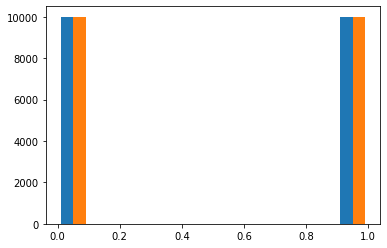

In [7]:
plt.hist(test_spheres.all_actual_distances.numpy())

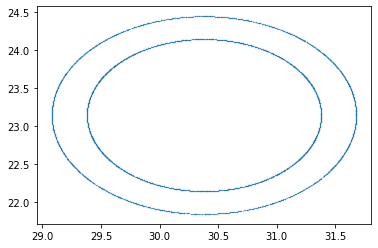

In [8]:
plt.scatter(test_spheres.on_mfld_pts_trivial_[:, 0] + test_spheres.translation[0], test_spheres.on_mfld_pts_trivial_[:, 1] + test_spheres.translation[1], s=0.01)

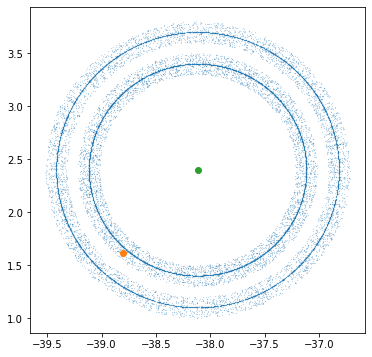

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(test_spheres.all_points_rot_[:, 0], test_spheres.all_points_rot_[:, 1], s=0.01)
plt.scatter(test_spheres.all_points_rot_[2, 0], test_spheres.all_points_rot_[2, 1])
plt.scatter(test_spheres.x_cn[0], test_spheres.x_cn[1])

x = test_spheres.poca[100]

# plt.scatter(test_spheres.poca[100, 0], test_spheres.poca[100, 1])
# plt.scatter(test_spheres.poca[0, 0], test_spheres.normed_all_points[0, 1], s=0.01)

In [10]:
test_spheres.poca_idx

array([1823, 1104, 1041, ..., 7234, 5541, 6402])

In [11]:
test_spheres.class_labels

tensor([2, 2, 2,  ..., 1, 1, 1])

In [12]:
np.linalg.norm(test_spheres.all_points_rot_[:100] - test_spheres.x_cn, axis=1) - 1.

array([ 0.07092285, -0.09442133,  0.04441857,  0.08644032, -0.0391795 ,
        0.09229946, -0.09445328, -0.05841678,  0.09130824,  0.02646291,
        0.03424394, -0.08202118, -0.08259404, -0.04806674,  0.0177108 ,
       -0.04852784,  0.0986383 ,  0.03783762,  0.0838387 ,  0.08963895,
        0.02608347,  0.06743753, -0.05673409,  0.08949292, -0.04413348,
       -0.05458462, -0.08761609, -0.08347321,  0.05237937, -0.04147267,
        0.06933415, -0.00822687, -0.0649426 , -0.04096824, -0.09669316,
       -0.05223191, -0.05815989, -0.0665372 ,  0.03155494,  0.02996051,
       -0.05983198,  0.02516139, -0.08586931, -0.02907157, -0.03814793,
        0.07393563,  0.0317955 ,  0.07845747, -0.01830113,  0.06206131,
       -0.09906697,  0.05512428,  0.09935069,  0.01726651, -0.09116656,
        0.04886961,  0.02261245,  0.07318842,  0.04211462,  0.09417665,
        0.01474226,  0.05204701, -0.01923722, -0.02044189,  0.06386316,
        0.03889465,  0.06611323,  0.02635109, -0.09256327,  0.07

In [13]:
test_spheres.class_labels

tensor([2, 2, 2,  ..., 1, 1, 1])

In [14]:
np.linalg.norm(test_spheres.normed_all_points[10000:15000] - test_spheres.fix_center, ord=2, axis=1) - 1.3




array([-0.06261627,  0.02216024, -0.02073417, ...,  0.05206254,
        0.09125717, -0.06913247])

In [15]:
test_spheres.normed_all_actual_distances[10000:15000]

tensor([[1.0000, 0.0626],
        [1.0000, 0.0222],
        [1.0000, 0.0207],
        ...,
        [1.0000, 0.0521],
        [1.0000, 0.0913],
        [1.0000, 0.0691]])

In [16]:
np.where(test_spheres.normed_all_actual_distances[test_spheres.class_labels == 2][:, 0] > 0.1)[0].shape

(5000,)

TypeError: 'NoneType' object is not subscriptable

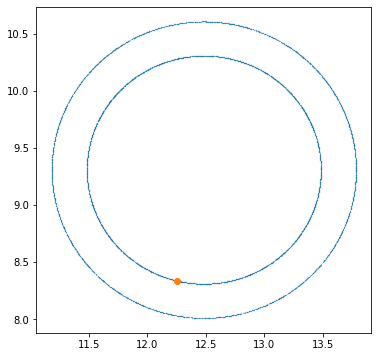

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(test_spheres.on_mfld_pts_trivial_[:, 0], test_spheres.on_mfld_pts_trivial_[:, 1], s=0.01)
idx = 2000
plt.scatter(test_spheres.poca[idx][0], test_spheres.poca[idx][1])
tan_dir_local = test_spheres.tang_dset[test_spheres.poca_idx[idx]][0]
norm_dir_local = test_spheres.norm_dset[test_spheres.poca_idx[idx]][0]

plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], tan_dir_local[0], tan_dir_local[1])
plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], norm_dir_local[0], norm_dir_local[1])

on_mfld_pt = test_spheres.poca[idx]
norm_dir = test_spheres.norm_dset[test_spheres.poca_idx[idx]]
rdm_coeffs = np.random.normal(0, 1, size=norm_dir.shape[0]).reshape(-1, 1)
norm_delta = np.sum(rdm_coeffs * norm_dir, axis=0)
off_mfld_pt = on_mfld_pt + norm_delta

plt.scatter(test_spheres.new_poca_dset[idx][0], test_spheres.new_poca_dset[idx][1])
# off_mfld_idx = idx if idx < test_spheres.S1.genattrs.num_neg else idx + (test_spheres.S1.genattrs.N - test_spheres.S1.genattrs.num_neg)
# plt.scatter(test_spheres.all_points[idx][0], test_spheres.all_points[idx][1])
plt.scatter(off_mfld_pt[0], off_mfld_pt[1])

In [19]:
test_spheres.all_tang_and_norms[-1]

array([[-0.68687867, -0.7267721 ],
       [-0.7267721 ,  0.68687867]])

In [22]:
test_spheres.all_points_trivial_[-1] / np.linalg.norm(test_spheres.all_points_trivial_[-1], ord=2)

tensor([0.8473, 0.5310])

In [ ]:
test_spheres.x_cn

In [ ]:
np.random.choice([1, 2, 3, 4, 5, 6], size=4)

In [ ]:
np.where(test_spheres == 2)[0].shape

# Testing inferred manifold generation code on 06/05/2022

In [3]:
dir_name = "/data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/"
train_set, val_set, test_set = ConcentricSpheres.load_splits(dir_name)



15-05-2022 18:12:42 -- [I] root >> [ConcentricSpheres]: data attribute (_x_ck) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/_x_ck.pkl
15-05-2022 18:12:42 -- [I] root >> [ConcentricSpheres]: data attribute (_x_cn) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/_x_cn.pkl
15-05-2022 18:12:42 -- [I] root >> [ConcentricSpheres]: data attribute (_rotation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/_rotation.pkl
15-05-2022 18:12:42 -- [I] root >> [ConcentricSpheres]: data attribute (_translation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/_translatio

15-05-2022 18:12:42 -- [I] root >> [RandomSphere]: data attribute (_rotation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/S2_dump/_rotation.pkl
15-05-2022 18:12:42 -- [I] root >> [RandomSphere]: data attribute (_translation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/S2_dump/_translation.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (points_k) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/train/S2_dump/points_k.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_ck) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/t

15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (normed_points_n) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/val/S1_dump/normed_points_n.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (normed_distances) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/val/S1_dump/normed_distances.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (normed_actual_distances) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/val/S1_dump/normed_actual_distances.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_ck) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_

15-05-2022 18:12:43 -- [I] root >> [ConcentricSpheres]: data attribute (_x_ck) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/_x_ck.pkl
15-05-2022 18:12:43 -- [I] root >> [ConcentricSpheres]: data attribute (_x_cn) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/_x_cn.pkl
15-05-2022 18:12:43 -- [I] root >> [ConcentricSpheres]: data attribute (_rotation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/_rotation.pkl
15-05-2022 18:12:43 -- [I] root >> [ConcentricSpheres]: data attribute (_translation) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/_translation.pk

15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_cn_trivial_) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/S1_dump/x_cn_trivial_.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_cn_tr_) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/S1_dump/x_cn_tr_.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_cn_rot_) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/test/S1_dump/x_cn_rot_.pkl
15-05-2022 18:12:43 -- [I] root >> [RandomSphere]: data attribute (x_cn) loaded from file: /data/t-achetan_2/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n2_noninfdist_bs4096_inferred_debug/data/te

In [4]:
train_set.all_tang_and_norms.shape

(5000, 2, 2)

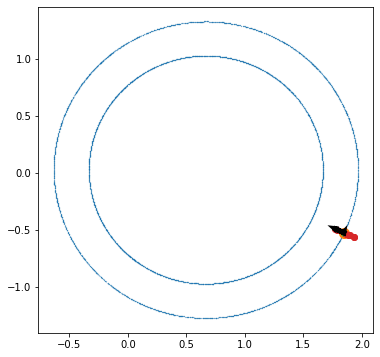

In [5]:
plt.figure(figsize=(6, 6))

onmfld_idx = -200
plt.scatter(train_set.on_mfld_pts_k_[:, 0], train_set.on_mfld_pts_k_[:, 1], s=0.01)
plt.scatter(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], s=100)
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.all_tang_and_norms[onmfld_idx][0][0], train_set.all_tang_and_norms[onmfld_idx][0][1])
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.all_tang_and_norms[onmfld_idx][1][0], train_set.all_tang_and_norms[onmfld_idx][1][1])
# plt.scatter(train_set.new_poca_dset[idx][0], train_set.new_poca_dset[idx][1])
plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.on_mfld_pb[onmfld_idx][1][0], train_set.on_mfld_pb[onmfld_idx][1][1], linewidth=5)
plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.off_mfld_pb[onmfld_idx][1][0], train_set.off_mfld_pb[onmfld_idx][1][1], linewidth=5)

plt.scatter(train_set.all_points_trivial_[:, 0][onmfld_idx], train_set.all_points_trivial_[:, 1][onmfld_idx])
plt.scatter(train_set.off_mfld_pts_for_chunk[onmfld_idx][:, 0], train_set.off_mfld_pts_for_chunk[onmfld_idx][:, 1])

In [7]:
train_set.all_tang_and_norms[-1]

array([[ 0.03773936,  0.99928762],
       [-0.99928762,  0.03773936]])

In [12]:
np.dot(train_set.on_mfld_pts_trivial_[-1] / np.linalg.norm(train_set.on_mfld_pts_trivial_[-1]), train_set.all_tang_and_norms[-1][-1])

-0.9996711520986382

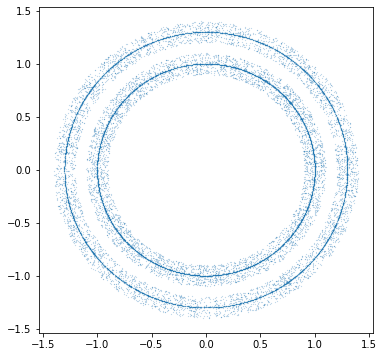

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(train_set.normed_all_points[:, 0], train_set.normed_all_points[:, 1], s=0.01)


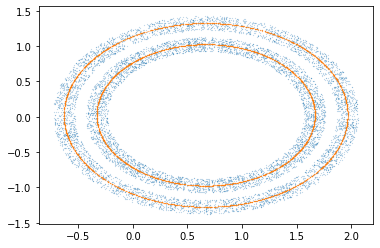

In [7]:
plt.scatter(train_set.all_points_trivial_[:, 0][train_set.class_labels == 2], train_set.all_points_trivial_[:, 1][train_set.class_labels == 2], s=0.01)
plt.scatter(train_set.on_mfld_pts_k_[train_set.poca_idx, 0], train_set.on_mfld_pts_k_[train_set.poca_idx, 1], s=0.01)


In [6]:
train_set.poca_idx_counts

array([0, 2, 2, ..., 4, 0, 1])

In [18]:
train_set.all_points.shape

torch.Size([20000, 2])

In [5]:
train_set.off_mfld_pts_for_chunk.shape

torch.Size([5000, 5000, 7, 2])

In [5]:
train_set.off_mfld_pts_for_chunk[:, 0].shape

torch.Size([5000, 7, 2])

In [12]:
train_set.on_mfld_pb.shape

torch.Size([5000, 7, 2])

In [18]:
train_set.on_mfld_pts_k_[:1] + train_set.off_mfld_pb[:1].numpy()

array([[[1.71683938, 0.06261796],
        [1.7470388 , 0.06150358],
        [1.68384956, 0.0638353 ],
        [1.66862334, 0.06439715],
        [1.62422274, 0.06603555],
        [1.57480822, 0.06785897],
        [1.72582868, 0.06228625]]])

In [19]:
train_set.off_mfld_pb[:1].numpy()

array([[[ 5.05993629e-02, -1.86713907e-03],
        [ 8.07987868e-02, -2.98151129e-03],
        [ 1.76095499e-02, -6.49800251e-04],
        [ 2.38332331e-03, -8.79456936e-05],
        [-4.20172697e-02,  1.55045600e-03],
        [-9.14317974e-02,  3.37387412e-03],
        [ 5.95886650e-02, -2.19884833e-03]]])

In [20]:
train_set.on_mfld_pts_k_[:1]

array([[1.66624001, 0.0644851 ]])

In [7]:
a = np.zeros((2, 500))
a[0, :] = 1
a[1, :] = 2
b = np.zeros((2, 7, 500))
(np.expand_dims(a, 1) + b).reshape(-1, 500)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [26]:
(np.expand_dims(train_set.on_mfld_pts_k_[5000:], 1) + (np.expand_dims(train_set.on_mfld_pb_sizes / np.linalg.norm(train_set.on_mfld_pb, axis=-1), axis=-1) * train_set.on_mfld_pb.numpy())) + train_set.off_mfld_pb.numpy()




array([[[-0.58155689,  0.07109426],
        [-0.55140557,  0.0686762 ],
        [-0.61453667,  0.07258354],
        ...,
        [-0.67417293,  0.07452784],
        [-0.72362425,  0.07535415],
        [-0.57256796,  0.07075253]],

       [[ 0.44433024,  1.24901148],
        [ 0.43235911,  1.31888059],
        [ 0.45160289,  1.21083028],
        ...,
        [ 0.4183873 ,  1.38904757],
        [ 0.44465313,  1.24640954],
        [ 0.4388355 ,  1.28155884]],

       [[ 0.32582563, -1.27350549],
        [ 0.34365983, -1.20511526],
        [ 0.3216463 , -1.28653259],
        ...,
        [ 0.32458454, -1.27245372],
        [ 0.35722993, -1.15548204],
        [ 0.31183927, -1.32655276]],

       ...,

       [[-0.5439389 , -0.0168103 ],
        [-0.6311866 , -0.02054023],
        [-0.54738371, -0.01736266],
        ...,
        [-0.6826027 , -0.02339838],
        [-0.60621412, -0.02074295],
        [-0.68382392, -0.02374516]],

       [[ 1.83799819, -0.39204391],
        [ 1.97434672, -0.43

In [18]:
train_set.on_mfld_pb.shape

torch.Size([5000, 7, 2])